## Insurance Charges Prediction

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import pylab as py

In [2]:
data= pd.read_csv(r"Downloads/ML dataset.csv")

In [3]:
df = pd.DataFrame(data,columns=['charges','age', 'sex', 'bmi', 'children', 'smoker', 'region'])

data.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,4,16884.9240
1,18,1,33.77,1,0,3,1725.5523
2,28,1,33.00,3,0,3,4449.4620


In [4]:
df.columns

Index(['charges', 'age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')

In [5]:
df.isnull().sum()

charges     0
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
dtype: int64

In [6]:
df.describe()

,charges,age,sex,bmi,children,smoker,region
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,13270.422265,39.207025,0.505232,30.663397,1.094918,0.204783,2.515695
std,12110.011237,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885
min,1121.873900,18.000000,0.000000,15.960000,0.000000,0.000000,1.000000
25%,4740.287150,27.000000,0.000000,26.296250,0.000000,0.000000,2.000000
50%,9382.033000,39.000000,1.000000,30.400000,1.000000,0.000000,3.000000
75%,16639.912515,51.000000,1.000000,34.693750,2.000000,0.000000,3.000000
max,63770.428010,64.000000,1.000000,53.130000,5.000000,1.000000,4.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   charges   1338 non-null   float64
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   int64  
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   int64  
 6   region    1338 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


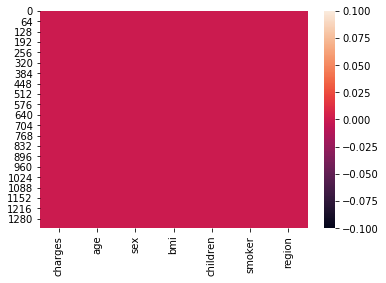

In [8]:
#checking for missing value by heatmap

sns.heatmap(df.isnull(),cbar=True)

In [9]:
sex_new=df["sex"].replace([1,0],["male","female"])

In [10]:
sex_new.value_counts()

male      676
female    662
Name: sex, dtype: int64

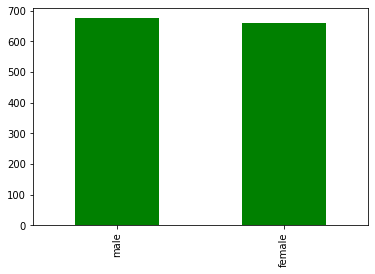

In [11]:
sex_new.value_counts().plot.bar(color='g')

#### Heat map represnts presence of no null values

In [12]:
df.corr()

,charges,age,sex,bmi,children,smoker,region
charges,1.000000,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208
age,0.299008,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127
sex,0.057292,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588
bmi,0.198341,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566
children,0.067998,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569
smoker,0.787251,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181
region,-0.006208,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000


### Here we can highest correlation in  between charges and smoking habit i.e 0.787

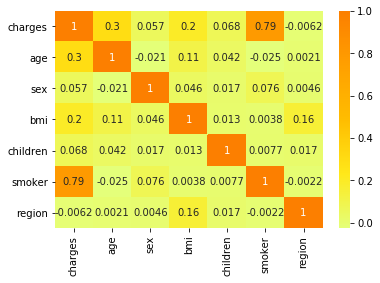

In [13]:
sns.heatmap(df.corr(),cmap='Wistia',annot=True)

In [14]:
# Pval should be less than 0.05 for variables to be correlated
pval0 = ttest_rel(df.charges,df.bmi)
pval1 = ttest_rel(df.age,df.bmi)
pval2 = ttest_rel(df.bmi,df.region)
pval3 = ttest_rel(df.bmi,df.sex)
pval4 = ttest_rel(df.smoker,df.bmi)

print(pval0)
print(pval1)
print(pval2)
print(pval3)
print(pval4)

Ttest_relResult(statistic=39.99511148430065, pvalue=1.0818204227392624e-230)
Ttest_relResult(statistic=21.27059822155172, pvalue=1.0330550049532575e-86)
Ttest_relResult(statistic=170.9248747569711, pvalue=0.0)
Ttest_relResult(statistic=180.9769764202931, pvalue=0.0)
Ttest_relResult(statistic=-182.34560884310582, pvalue=0.0)


First was obvious that Charges being a dependent variable has pval less than 0.05
But we can see correlation in between independent variables too as pvalues for BMI-AGE, BMI-Region, BMI-SEX, BMI-Smoker are less than 0.05.
#### There may be multicollinearity in this dataset

### Testing multicollinearity

In [16]:
X= data.drop(['charges'], axis = 1)
Y= data['charges']
multi_model = sm.OLS.from_formula("Y~X",data=df)
result = multi_model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     668.1
Date:                Sun, 04 Oct 2020   Prob (F-statistic):               0.00
Time:                        11:37:21   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.146e+04    983.002    -11.660      0.000   -1.34e+04   -9533.410
X[0]         257.2881     11.886     21.647      0.000     233.971     280.605
X[1]        -131.1106    332.811     -0.394      0.694    -784.001     521.780
X[2]         332.5701     27.722     11.997      0.000     278.186     386.954
X[3]         479.3694    137.644      3.483      0.001     209.346     749.393
X[4]        2.382e+04    411.843     57.839      0.000     2.3e+04    2.46e+04
X[5]        -353.6400    151.927     -2.328      0.020    -651.682     -55.598
==============================================================================
Omnibus:                      299.003   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              713.975
Skew:                           1.207   Prob(JB):                    9.17e-156
Kurtosis:                       5.642   Cond. No.                         305.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
r_square= 0.751

VIF=1/(1-r_square)
VIF

4.016064257028113

Here as VIF = 4 that implies there is no need of investigation on accounts of *multicollinearity*. We can trust the model and can carry out further analysis.

In [18]:
# Encoding the data with map function
df["sex"]=df["sex"].replace([1,0],["male","female"])
df['smoker'] = df['smoker'].map({1:'yes',0:'no'})
df['region'] = df['region'].map({1:'southeast',2:'southwest',3:'northwest',4:'northeast'})

In [19]:
df.head()

,charges,age,sex,bmi,children,smoker,region
0,16884.92400,19,female,27.900,0,yes,northeast
1,1725.55230,18,male,33.770,1,no,northwest
2,4449.46200,28,male,33.000,3,no,northwest
3,21984.47061,33,male,22.705,0,no,southwest
4,3866.85520,32,male,28.880,0,no,southwest


In [20]:
df['region'].value_counts()

northwest    364
northeast    325
southwest    325
southeast    324
Name: region, dtype: int64

In [21]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

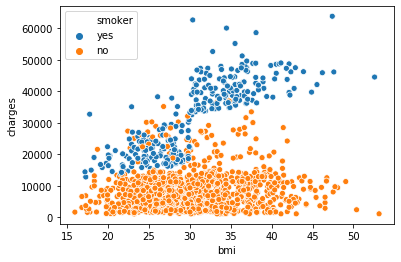

In [24]:
sns.scatterplot(x=df['bmi'],y=df['charges'],hue=df['smoker'])

Person with smoking addiction seems to pay more for medical treatment.

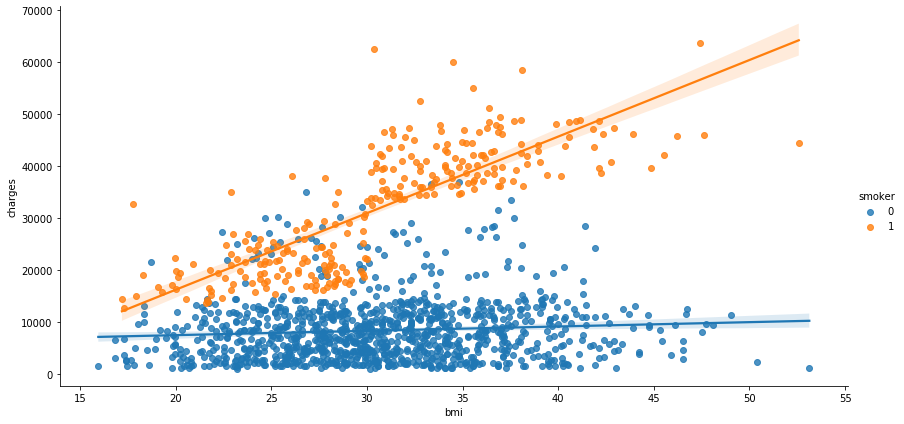

In [25]:
sns.lmplot(data=data,x='bmi',y='charges',aspect=2,height=6,hue='smoker')

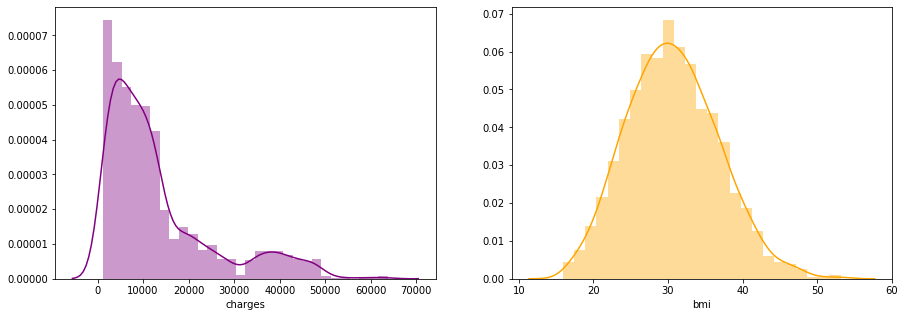

In [26]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
sns.distplot(data['charges'],ax=axes[0],color='purple')
sns.distplot(data['bmi'],ax=axes[1],color='orange')

Average charges at 10000 to 20000 and are right skewed and BMI is normally distrubuted

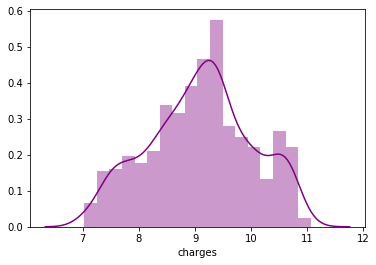

In [27]:
 sns.distplot(np.log(data['charges']),color='purple')

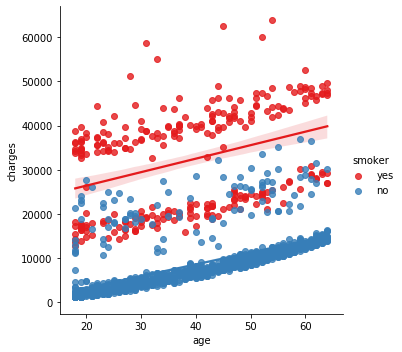

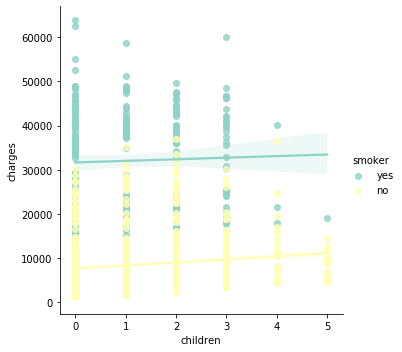

In [28]:
ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'children', y = 'charges', data=df, hue='smoker', palette='Set3')

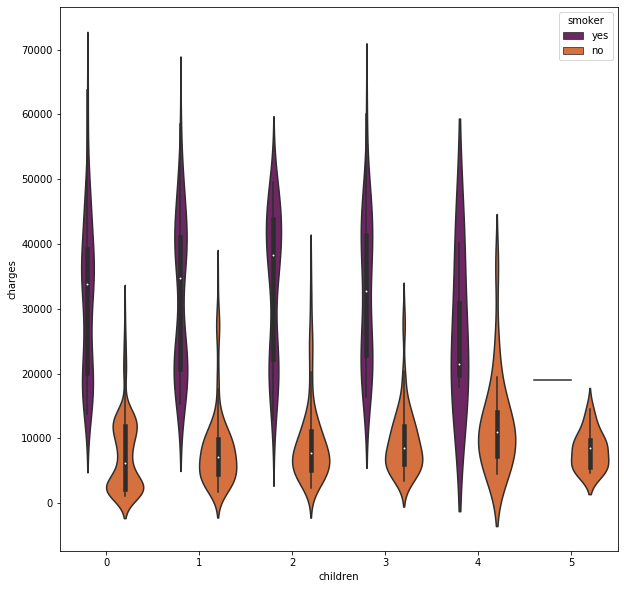

In [29]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.violinplot(x = 'children', y = 'charges', data=df,
                 orient='v', hue='smoker', palette='inferno')

## Model Building and prediction

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split as holdout

### Multiple Linear Regression

In [31]:
x = data.drop(['charges'], axis = 1)
y = data['charges']
x_train, x_test, y_train, y_test = holdout(x, y, test_size=0.2, random_state=0)
Lin_reg = LinearRegression()
Lin_reg.fit(x_train, y_train)
print(Lin_reg.intercept_)
print(Lin_reg.coef_)
print(Lin_reg.score(x_test, y_test))

-11373.475336280682
[  253.99185244   -24.32455098   328.40261701   443.72929547
 23568.87948381  -288.50857254]
0.799874714544996


In [32]:
result = sm.OLS(y_train,x_train).fit()
y_pred = result.predict(x_test)

In [33]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.870
Model:                            OLS   Adj. R-squared (uncentered):              0.869
Method:                 Least Squares   F-statistic:                              1183.
Date:                Sun, 04 Oct 2020   Prob (F-statistic):                        0.00
Time:                        11:46:09   Log-Likelihood:                         -10902.
No. Observations:                1070   AIC:                                  2.182e+04
Df Residuals:                    1064   BIC:                                  2.185e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          200.1899     13.032     15.362      0.000     174.619     225.760
sex         -550.3671    391.970     -1.404      0.161   -1319.489     218.755
bmi           95.9498     22.046      4.352      0.000      52.691     139.209
children     296.9442    162.981      1.822      0.069     -22.857     616.745
smoker      2.301e+04    487.275     47.214      0.000     2.2e+04     2.4e+04
region      -786.2605    173.369     -4.535      0.000   -1126.444    -446.077
==============================================================================
Omnibus:                      240.110   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              564.288
Skew:                           1.208   Prob(JB):                    2.93e-123
Kurtosis:                       5.611   Cond. No.                         127.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
acc_Regression=(r2_score(y_test,y_pred)*100)
acc_Regression

77.49982214001871

### Ridge Regression

In [35]:
Ridge = Ridge(alpha=0.5)
Ridge.fit(x_train, y_train)
print(Ridge.intercept_)
print(Ridge.coef_)
acc_Ridge=(Ridge.score(x_test, y_test)*100)
acc_Ridge

-11354.413056835978
[ 2.53893751e+02 -2.15112284e+01  3.28339566e+02  4.44238477e+02
  2.35009674e+04 -2.89027871e+02]


79.96989632063139

### Lasso Regression

In [36]:
Lasso = Lasso(alpha=0.2, fit_intercept=True, normalize=False, precompute=False, max_iter=1000,
              tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
Lasso.fit(x_train, y_train)
print(Lasso.intercept_)
print(Lasso.coef_)
acc_Lasso=(Lasso.score(x_test, y_test)*100)
acc_Lasso

-11373.498633273333
[ 2.53991436e+02 -2.34569821e+01  3.28389438e+02  4.43587436e+02
  2.35676136e+04 -2.88340296e+02]


79.98690236224705

In [37]:
x = df.drop(['charges'], axis=1)
y = df.charges
Rfr = rfr(n_estimators = 100, criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
Rfr.fit(x_train,y_train)
x_train_pred = Rfr.predict(x_train)
x_test_pred = Rfr.predict(x_test)

print('MSE train data: %.3f, MSE test data: %.3f' % 
      (metrics.mean_squared_error(x_train_pred, y_train),
       metrics.mean_squared_error(x_test_pred, y_test)))
print('R2 train data: %.3f, R2 test data: %.3f' % 
      (metrics.r2_score(y_train,x_train_pred, y_train),
       metrics.r2_score(y_test,x_test_pred, y_test)))


MSE train data: 3630549.354, MSE test data: 19737210.132
R2 train data: 0.971, R2 test data: 0.877


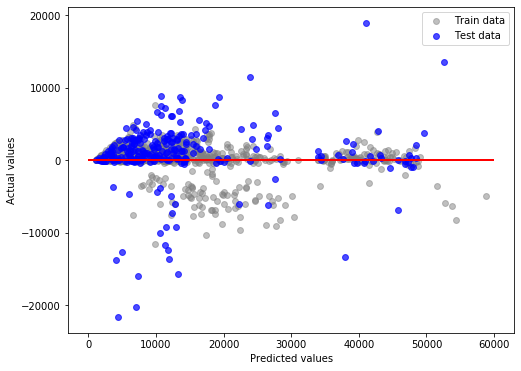

In [38]:
plt.figure(figsize=(8,6))

plt.scatter(x_train_pred, x_train_pred - y_train,
          c = 'gray', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(x_test_pred, x_test_pred - y_test,
          c = 'blue', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.legend(loc = 'upper right')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')

### Feature Importance

Feature importance ranking


1.smoker(0.601678)
2.bmi(0.218751)
3.age(0.136942)
4.children(0.021042)
5.region(0.015209)
6.sex(0.006377)


<BarContainer object of 6 artists>

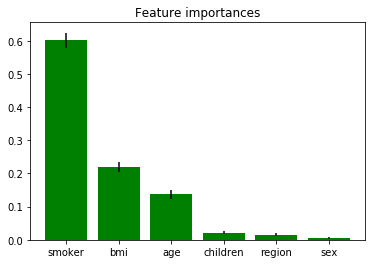

In [39]:
print('Feature importance ranking\n\n')
importances = Rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in Rfr.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
variables = ['age', 'sex', 'bmi', 'children','smoker', 'region']
importance_list = []
for f in range(x.shape[1]):
    variable = variables[indices[f]]
    importance_list.append(variable)
    print("%d.%s(%f)" % (f + 1, variable, importances[indices[f]]))
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(importance_list, importances[indices],
       color="g", yerr=std[indices], align="center")

We can see that Children,region and sex are almost unimportant factors that affect the charges so we will drop these variables and aagin fit the model

In [40]:
x = data.drop(['charges','sex','region','children'], axis = 1)
y = data['charges']
x_train, x_test, y_train, y_test = holdout(x, y, test_size=0.2, random_state=0)
Lin_reg = LinearRegression()
Lin_reg.fit(x_train, y_train)
print(Lin_reg.intercept_)
print(Lin_reg.coef_)
print(Lin_reg.score(x_test, y_test))

-11571.908016839918
[  257.04066602   321.83997719 23625.23448834]
0.7945500805653087


In [41]:
result = sm.OLS(y_train,x_train).fit()
y_pred = result.predict(x_test)

In [42]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.867
Model:                            OLS   Adj. R-squared (uncentered):              0.866
Method:                 Least Squares   F-statistic:                              2309.
Date:                Sun, 04 Oct 2020   Prob (F-statistic):                        0.00
Time:                        11:49:47   Log-Likelihood:                         -10914.
No. Observations:                1070   AIC:                                  2.183e+04
Df Residuals:                    1067   BIC:                                  2.185e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          196.9112     13.036     15.105      0.000     171.331     222.491
bmi           38.2095     17.551      2.177      0.030       3.771      72.648
smoker      2.297e+04    490.646     46.808      0.000     2.2e+04    2.39e+04
==============================================================================
Omnibus:                      247.222   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              584.930
Skew:                           1.240   Prob(JB):                    9.64e-128
Kurtosis:                       5.640   Cond. No.                         126.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

There is notable increase in our new model which consists of only 'bmi','age','charges'

In [43]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(y_test, y_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(y_test, y_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(y_test, y_pred), 2)) 
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

Mean absolute error = 4279.98
Mean squared error = 37102653.97
Median absolute error = 2532.93
Explain variance score = 0.77
R2 score = 0.77


However the model  accuracy is same despite of the increased value of R-sq

In [44]:
x = data.drop(['charges'], axis = 1)
y = data['charges']
x_train, x_test, y_train, y_test = holdout(x, y, test_size=0.2, random_state=0)

### Decision Tree

In [46]:
regressor = DecisionTreeRegressor(random_state = 0)  
  
# fit the regressor with X and Y data 
regressor.fit(x_train, y_train) 
y_pred = regressor.predict(x_test)
acc_decision_tree = round(regressor.score(x_train, y_train) * 100, 2)
acc_decision_tree

99.83

### Random Forest

In [47]:
 # create regressor object 
regressor = rfr(n_estimators = 100, random_state = 0) 
  
# fit the regressor with x and y data 
regressor.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [48]:
y_pred = regressor.predict(x_test)  # test the output by changing values 
acc_Random_forest = round(regressor.score(x_train, y_train) * 100, 2)
acc_Random_forest

97.37

### KNeighbors Regression

In [49]:
from sklearn.model_selection import train_test_split
X=pd.DataFrame(X)
Y=pd.DataFrame(Y)

In [50]:
X=X.values.reshape(-1,1)
Y=Y.values.reshape(-1,1)

In [51]:
sc_X = StandardScaler()
sc_Y = StandardScaler()
X = sc_X.fit_transform(X)
Y = sc_Y.fit_transform(Y)

In [52]:
# create training and testing vars
X_train, X_test, Y_train, Y_test = train_test_split(data, Y, test_size=0.2)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(1070, 7) (1070, 1)
(268, 7) (268, 1)


In [53]:
X_train=X_train.drop(['charges'],axis=1)
X_test=X_test.drop(['charges'],axis=1)

In [54]:
# instantiate the model and set the number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets
reg.fit(X_train, Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [55]:
y_pred = reg.predict(X_test)
acc_KNregressor = round(reg.score(X_train, Y_train) * 100, 2)
acc_KNregressor

53.9

## Result:

In [56]:
models = pd.DataFrame({
    'Model': ['Regression','Lasso Regression','Ridge Regression','KNN', 
              'Decision Tree','Random Forest'],
    'Score': [ acc_Regression,acc_Lasso,acc_Ridge,acc_KNregressor, acc_decision_tree, 
              acc_Random_forest]})
models.sort_values(by='Score', ascending=False)

,Model,Score
4,Decision Tree,99.830000
5,Random Forest,97.370000
1,Lasso Regression,79.986902
2,Ridge Regression,79.969896
0,Regression,77.499822
3,KNN,53.900000


##### Conclusion:

1)From our analysis we can conclude that the people with smoking habits have to pay more for the medical treatment.

2)Age of the person is also an important factor affecting the medicle charges paid.

3)No. of children, region and gender of the person hardly affect the medical charges paid.